In [2]:
import tensorflow as tf
import sys

### Checking Python and Tf Version and if GPU is installed and used properly

And we can check the comptability of versions with :- https://www.tensorflow.org/install/source_windows#gpu

In [3]:
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))
print(sys.version)

2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
3.10.0 | packaged by conda-forge | (default, Nov 10 2021, 13:20:59) [MSC v.1916 64 bit (AMD64)]


# Start to Create the CNN

## 1) Pre-process data and make it ready for the CNN Model

## ROUGH WORK!!!!!

In [3]:
data_dir_train = r"D:\Machine Learning\Sample Project1\Notes Notebooks\Working_Data\pizza_steak\train"
data_dir_test = r"D:\Machine Learning\Sample Project1\Notes Notebooks\Working_Data\pizza_steak\test"

In [20]:
train_ds,valid_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                       validation_split=0.15,
                                                       subset="both",
                                                       seed=42,
                                                       image_size=(224,224),
                                                       batch_size=32
                                                        )

Found 1500 files belonging to 2 classes.
Using 1275 files for training.
Using 225 files for validation.


In [21]:
type(train_ds),type(valid_ds)

(tensorflow.python.data.ops.dataset_ops.BatchDataset,
 tensorflow.python.data.ops.dataset_ops.BatchDataset)

In [24]:
rescale = tf.keras.Sequential([
                                tf.keras.layers.Rescaling(scale=1.0/255.0)])

In [26]:
train_ds1 = rescale(train_ds)

ValueError: Exception encountered when calling layer "rescaling_1" "                 f"(type Rescaling).

Attempt to convert a value (<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>) to a Tensor.

Call arguments received by layer "rescaling_1" "                 f"(type Rescaling):
  • inputs=<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
images,labels = next(iter(train_ds))
image = images[0]

In [28]:
res_img = rescale(image)

In [29]:
res_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.0670068 , 0.05916367, 0.07877152],
        [0.08093238, 0.07308923, 0.09269708],
        [0.07444979, 0.06660665, 0.08621449],
        ...,
        [0.1485387 , 0.11548565, 0.07150814],
        [0.13893564, 0.10756309, 0.06442583],
        [0.15652308, 0.12122896, 0.08593483]],

       [[0.09765907, 0.08981593, 0.10942377],
        [0.08291317, 0.07507003, 0.09467787],
        [0.06576631, 0.05792318, 0.07753102],
        ...,
        [0.13463368, 0.10158062, 0.05928361],
        [0.14871955, 0.117347  , 0.07420974],
        [0.14911966, 0.11382554, 0.07853143]],

       [[0.07847139, 0.07062826, 0.0902361 ],
        [0.07781113, 0.06996799, 0.08957583],
        [0.07909164, 0.0712485 , 0.08917567],
        ...,
        [0.15210094, 0.11856766, 0.07777127],
        [0.14341737, 0.10812326, 0.07282913],
        [0.12745057, 0.09215645, 0.05686234]],

       ...,

       [[0.5613245 , 0.4907362 , 0.40614218],
        [0.73

In [31]:
train_ds1 = train_ds.map(map_func= lambda x,y:(rescale(x),y),
                         num_parallel_calls=tf.data.AUTOTUNE)

In [32]:
images,labels = next(iter(train_ds1))

In [36]:
images[3]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.06112446, 0.04151661, 0.05820328],
        [0.04865947, 0.03295318, 0.05014006],
        [0.04733894, 0.0394958 , 0.05910365],
        ...,
        [0.12382916, 0.0672467 , 0.02134862],
        [0.10672265, 0.05564219, 0.02773114],
        [0.09293696, 0.03803499, 0.03551399]],

       [[0.04863946, 0.03921569, 0.06218488],
        [0.04367747, 0.03191276, 0.05992397],
        [0.03915566, 0.03523409, 0.05932373],
        ...,
        [0.12352891, 0.06296485, 0.03579407],
        [0.0943777 , 0.03919562, 0.0367347 ],
        [0.08319301, 0.02408936, 0.04509777]],

       [[0.04789916, 0.04119648, 0.07563026],
        [0.04419768, 0.03551421, 0.07697079],
        [0.03837535, 0.03269308, 0.07264906],
        ...,
        [0.14611802, 0.08235269, 0.08207266],
        [0.11328514, 0.05138037, 0.08517396],
        [0.07845101, 0.01460535, 0.06636639]],

       ...,

       [[0.6156459 , 0.5770304 , 0.3344334 ],
        [0.62

In [205]:
# Creating Function for Visualizing Data Augmentation

import matplotlib.pyplot as plt
import random

def vis_augmen_img(normal,augmen):
    rand = random.randint(0,31)
    print(rand)
    plt.figure()
    normal =normal/255.0
    plt.imshow(normal[rand])
    plt.title("Original Image")
    plt.axis(False)
    plt.figure()
    plt.imshow(augmen[rand])
    plt.title("Augumentated Image")
    plt.axis(False)
    plt.show()

## NORMAL WORK Without Data Augmentation

In [30]:
# Loading Images From Directory To A Suitable Tensorflow DataSets


train_ds_mn,valid_ds_mn = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                                validation_split=0.15,
                                                                subset="both",
                                                                shuffle=True,
                                                                seed=42,
                                                                image_size=(224,224),
                                                                batch_size=32)

test_ds_mn = tf.keras.utils.image_dataset_from_directory(data_dir_test,
                                                         batch_size=32,
                                                         shuffle=True,
                                                         seed =42,
                                                         image_size=(224,224))

Found 1500 files belonging to 2 classes.
Using 1275 files for training.
Using 225 files for validation.
Found 500 files belonging to 2 classes.


In [31]:
images,labels= next(iter(train_ds_mn))

In [32]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0])>

In [53]:
model1 = tf.keras.Sequential([
                                tf.keras.layers.Rescaling(1.0/255.0),
                                tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                                tf.keras.layers.Conv2D(10,3,activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(10,3,activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(10,3,activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(1,activation="sigmoid")
])


model1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [54]:
hist = model1.fit(train_ds_mn,
           epochs=10,
           validation_data=valid_ds_mn,
           steps_per_epoch=len(train_ds_mn),
           validation_steps=len(valid_ds_mn))

Epoch 1/10
40/40 [==============================] - 3s 43ms/step - loss: 0.6133 - accuracy: 0.6549 - val_loss: 0.5279 - val_accuracy: 0.7556
Epoch 2/10
40/40 [==============================] - 2s 40ms/step - loss: 0.4634 - accuracy: 0.7875 - val_loss: 0.4695 - val_accuracy: 0.8044
Epoch 3/10
40/40 [==============================] - 2s 40ms/step - loss: 0.4359 - accuracy: 0.8055 - val_loss: 0.5165 - val_accuracy: 0.7600
Epoch 4/10
40/40 [==============================] - 2s 39ms/step - loss: 0.4117 - accuracy: 0.8188 - val_loss: 0.4188 - val_accuracy: 0.8178
Epoch 5/10
40/40 [==============================] - 2s 39ms/step - loss: 0.3742 - accuracy: 0.8416 - val_loss: 0.4432 - val_accuracy: 0.8044
Epoch 6/10
40/40 [==============================] - 2s 39ms/step - loss: 0.3719 - accuracy: 0.8431 - val_loss: 0.4229 - val_accuracy: 0.8044
Epoch 7/10
40/40 [==============================] - 2s 39ms/step - loss: 0.3443 - accuracy: 0.8557 - val_loss: 0.4278 - val_accuracy: 0.8044
Epoch 8/10
40

In [55]:
hist.history

{'loss': [0.6133077144622803,
  0.4633752107620239,
  0.4359036684036255,
  0.41171151399612427,
  0.3742154836654663,
  0.3718888461589813,
  0.34431084990501404,
  0.35103878378868103,
  0.32914626598358154,
  0.3191666603088379],
 'accuracy': [0.6549019813537598,
  0.7874509692192078,
  0.8054901957511902,
  0.818823516368866,
  0.841568648815155,
  0.843137264251709,
  0.8556862473487854,
  0.8541176319122314,
  0.8650980591773987,
  0.8729411959648132],
 'val_loss': [0.527945339679718,
  0.4694926142692566,
  0.5165278911590576,
  0.41881120204925537,
  0.4432220160961151,
  0.42293867468833923,
  0.4278086721897125,
  0.45488792657852173,
  0.3988136053085327,
  0.41269350051879883],
 'val_accuracy': [0.7555555701255798,
  0.804444432258606,
  0.7599999904632568,
  0.8177777528762817,
  0.804444432258606,
  0.804444432258606,
  0.804444432258606,
  0.7866666913032532,
  0.8177777528762817,
  0.8177777528762817]}

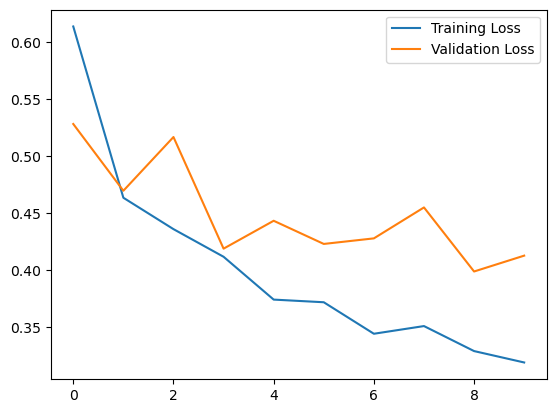

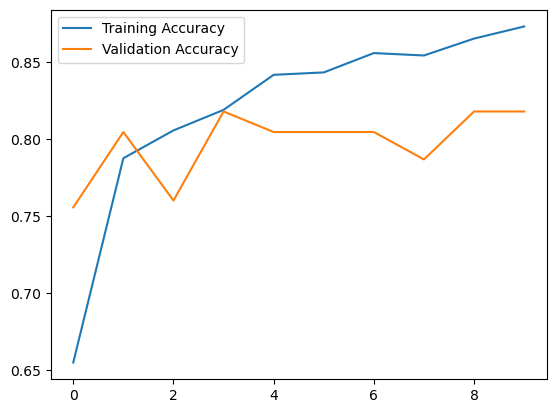

In [56]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.show()

# Normal Work with Data Augmentation

In [33]:
# Creating a Data Augmentation Keras Sequential Model

augmen_model = tf.keras.Sequential([
                                    tf.keras.layers.RandomRotation(factor=0.15),
                                    tf.keras.layers.RandomHeight(factor=0.15),
                                    tf.keras.layers.RandomWidth(factor=0.15),
                                    tf.keras.layers.RandomZoom(height_factor=0.15),
                                    tf.keras.layers.Resizing(224,224)
])

In [34]:
train_ds_new = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                           validation_split=0.15,
                                                           seed=42,
                                                           subset="training",
                                                           image_size=(224,224),
                                                           batch_size=None)

valid_ds_new = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                           validation_split=0.15,
                                                           seed=42,
                                                           subset="validation",
                                                           image_size=(224,224),
                                                           batch_size=32)

Found 1500 files belonging to 2 classes.
Using 1275 files for training.
Found 1500 files belonging to 2 classes.
Using 225 files for validation.


In [35]:
train_ds_new

<ShuffleDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [36]:
images,labels= next(iter(train_ds_new))

In [37]:
labels

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [38]:
valid_ds_new

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
images,labels= next(iter(valid_ds_new))

In [40]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0])>

In [41]:
train_ds_augmen = train_ds_new.map(map_func=(lambda x,y:(augmen_model(x),y)),
                                   num_parallel_calls=tf.data.AUTOTUNE)

In [42]:
images,labels= next(iter(train_ds_augmen))

In [43]:
labels

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [14]:
train_ds_augmen1 = train_ds_augmen.batch(32)
train_ds_augmen

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
images,labels = next(iter(train_ds_augmen))

In [19]:
labels[3]

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [9]:
model1 = tf.keras.Sequential([
                                tf.keras.layers.Rescaling(1.0/255.0),
                                tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                                tf.keras.layers.Conv2D(10,3,activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(10,3,activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(10,3,activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(1,activation="sigmoid")
])


model1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [10]:
hist = model1.fit(train_ds_augmen,
          epochs=100,
          steps_per_epoch=len(train_ds_augmen),
          validation_data=valid_ds_new,
          validation_steps=len(valid_ds_new)
          )

Epoch 1/100
40/40 [==============================] - 23s 88ms/step - loss: 0.6396 - accuracy: 0.6110 - val_loss: 0.5479 - val_accuracy: 0.7378
Epoch 2/100
40/40 [==============================] - 2s 54ms/step - loss: 0.5402 - accuracy: 0.7302 - val_loss: 0.5055 - val_accuracy: 0.7911
Epoch 3/100
40/40 [==============================] - 2s 53ms/step - loss: 0.4888 - accuracy: 0.7663 - val_loss: 0.4629 - val_accuracy: 0.7822
Epoch 4/100
40/40 [==============================] - 3s 54ms/step - loss: 0.4498 - accuracy: 0.7922 - val_loss: 0.5467 - val_accuracy: 0.7422
Epoch 5/100
40/40 [==============================] - 2s 53ms/step - loss: 0.4262 - accuracy: 0.8078 - val_loss: 0.4678 - val_accuracy: 0.8089
Epoch 6/100
40/40 [==============================] - 3s 55ms/step - loss: 0.4213 - accuracy: 0.8102 - val_loss: 0.4568 - val_accuracy: 0.8000
Epoch 7/100
40/40 [==============================] - 3s 54ms/step - loss: 0.4274 - accuracy: 0.8086 - val_loss: 0.4320 - val_accuracy: 0.8089
Epoch

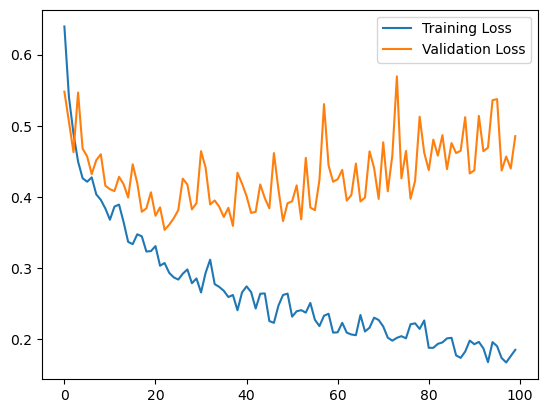

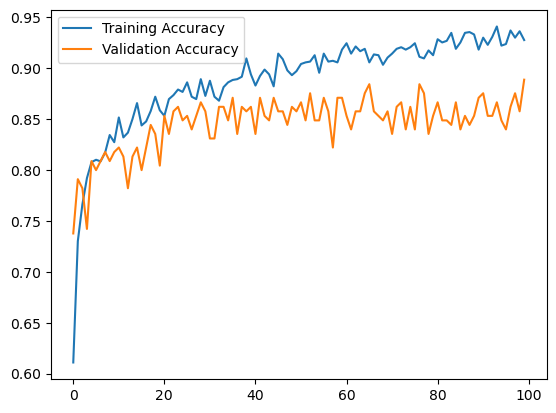

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.show()

In [14]:
model1.evaluate(test_ds_mn)

16/16 [==============================] - 2s 36ms/step - loss: 0.2839 - accuracy: 0.8960


[0.2838970124721527, 0.8960000276565552]